<a href="https://colab.research.google.com/github/Bokyoung-00/python_education/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉의 생존율을 예측

### 1. 데이터 분석 방법론
##### - 문제를 정의(Defining the problem statement)
##### - 데이터를 수집(Collection the data)
##### - 데이터를 탐색(Exploratory data analysis))
##### - 피처 엔지니어링(Feature Engineering)
##### - 모델링(Modeling)
##### - 평가(Evaluation)

### 2. CRISP- DM 분석 방법론(Cross Industry Standard Process for Data Mining)
##### 1) 업무 이해 (Business Understanding)
##### 2) 데이터 이해 (Data Understanding)
##### 3) 데이터 준비 (Data Preparation)
##### 4) 모델링 (Modeling)
##### 5) 평가 (Evaluation)

In [ ]:
from IPython.display import Image
Image(url="https://media.nationalgeographic.org/assets/photos/000/273/27302.jpg")

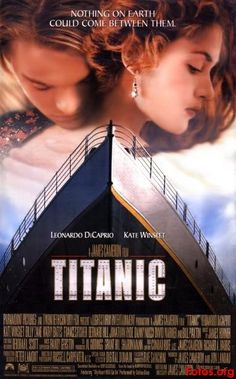

In [ ]:
from IPython.display import Image
Image("C:/bkk/titanic_poster.jpg")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic=pd.read_csv("C:/bkk/titanic.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.tail() #1 생존 0 사망

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn default for plots

## Categorical Features

### -Pclass
### -Sex
### -SibSp(# of siblings and spouse)
### -Parch(# of parents and children)
### -Embarked
### -Cabin

In [ ]:
## 성별 생존 유무의 인원수를 막대그래프로 그리기

In [ ]:
titanic[titanic['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
survived = titanic[titanic['Survived']==1]; survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
titanic[titanic['Survived']==1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
titanic[titanic['Survived']==1]["Sex"]

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [ ]:
survived=titanic[titanic['Survived']==1]["Sex"].value_counts(); survived

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
dead = titanic[titanic['Survived']==0]; dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
dead=titanic[titanic['Survived']==0]["Sex"].value_counts()

In [ ]:
survived

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
dead

male      468
female     81
Name: Sex, dtype: int64

In [ ]:
df=pd.DataFrame([survived, dead])

In [ ]:
df

,female,male
Sex,233,109
Sex,81,468


In [ ]:
df.index=['Survived','Dead'];df

,female,male
Survived,233,109
Dead,81,468


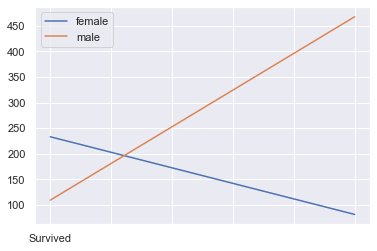

In [ ]:
df.plot()

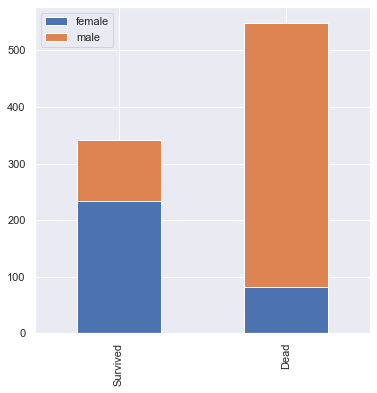

In [ ]:
df.plot(kind='bar',stacked=True,figsize=(6,6))

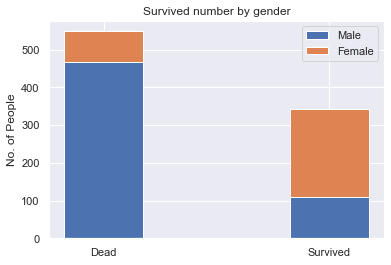

In [ ]:
labels = ['Dead','Survived']
Male_survive = [468, 109]
Female_survive = [81, 233]
width = 0.35 

fig, ax = plt.subplots()

ax.bar(labels, Male_survive,width, label='Male')
ax.bar(labels, Female_survive, width, bottom=Male_survive,
       label='Female')

ax.set_ylabel('No. of People')
ax.set_title('Survived number by gender')
ax.legend()

plt.show()

In [ ]:
################ Pclass별 생존 유무 인원수 막대그래프

In [ ]:
def bar_chart(feature):
    survived=titanic[titanic['Survived']==1][feature].value_counts()
    dead=titanic[titanic['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=["Survived","Dead"]
    df.plot(kind='bar', stacked=True, figsize=(6,6))

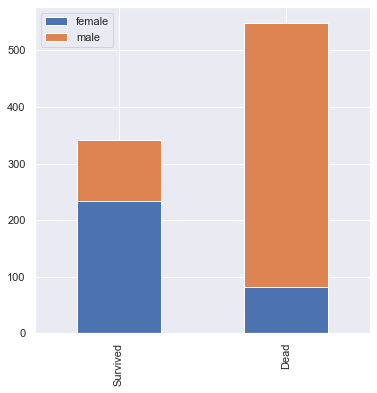

In [ ]:
bar_chart("Sex")

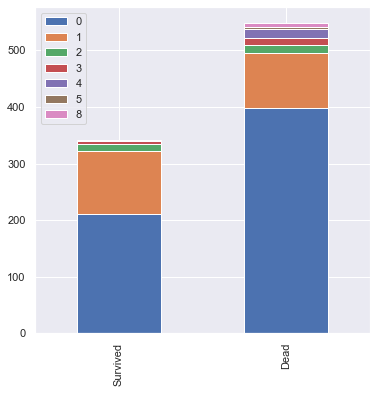

In [ ]:
bar_chart("SibSp")

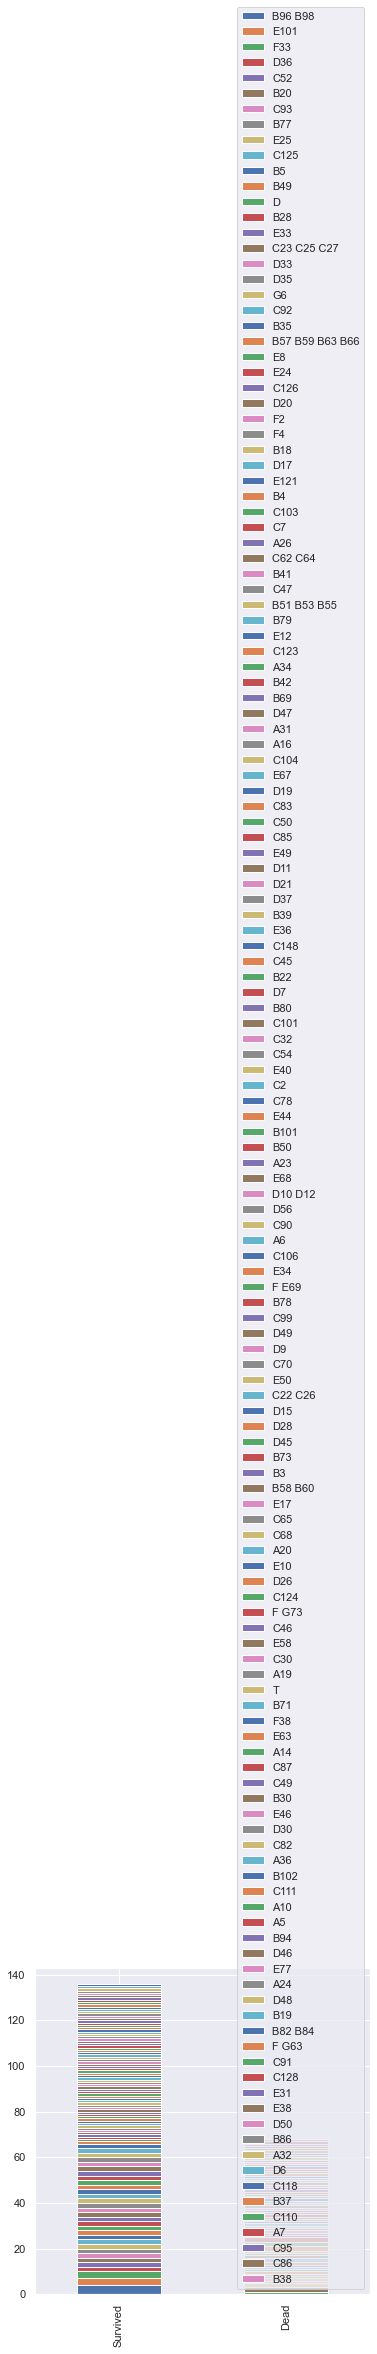

In [ ]:
bar_chart("Cabin")

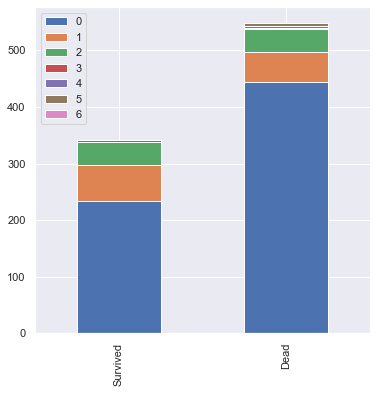

In [ ]:
bar_chart("Parch")

In [ ]:
# Feature engineering
##feature into vectors

In [ ]:
titanic.groupby('Pclass').agg({'Age':'max','SibSp':'sum','Fare':'mean'})

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


In [ ]:
#정규표현(Regular expression)- 특정한 규칙을 가진 문자열의 집합을 표현하는 방법

In [ ]:
titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
titanic['Title']=titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Countess      1
Don           1
Ms            1
Capt          1
Mme           1
Sir           1
Lady          1
Name: Title, dtype: int64

In [ ]:
#Title을 숫자로
#"Mr"=0, "Miss"=1, "Mrs"=2
#1. for문 돌리기
#2. pandas 기능

In [ ]:
for i in titanic['Title']:
    if i=="Mr":
        titanic['Titlenum']=0
    elif i=="Miss":
        titanic['Titlenum']=1
    elif i=="Mrs":
        titanic['Titlenum']=2
    else:
        titanic['Titlenum']=3

In [ ]:
titanic['Titlenum']=9

In [ ]:
titanic['Title'][i]

KeyError: 'Mr'

In [ ]:
##answer

In [ ]:
for row in range(0,len(titanic)):
    if titanic.iloc[row,12]=="Mr":
        titanic.iloc[row,13]=0
    elif titanic.iloc[row,12]=="Miss":
        titanic.iloc[row,13]=1
    elif titanic.iloc[row,12]=="Mrs":
        titanic.iloc[row,13]=2
    else:
        titanic.iloc[row,13]=3

In [ ]:
titanic.iloc[0,13]

0

In [ ]:
titanic["Title num"]=0

In [ ]:
title_mapping={"Mr":0,"Miss":1, "Mrs":2,"Master":3,"Dr":3,"Rev":3, "Col":3,"Major":3, "Mlle":3,"Jonkheer":3,
               "Countess":3, "Don":3,"Ms":3,"Capt":3,"Mme":3,"Sir":3,"Lady":3}

titanic['Titlenum']=titanic['Title'].map(title_mapping)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0


In [ ]:
titanic.drop("Name",axis=1, inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0


In [ ]:
titanic_01=titanic.copy()


In [ ]:
titanic_01.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0


In [ ]:
sex_mapping={"male":0,"female":1}
titanic['Sex']=titanic['Sex'].map(sex_mapping)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0


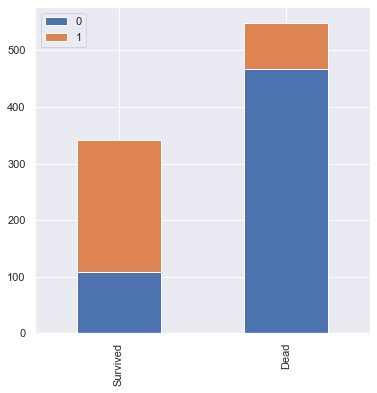

In [ ]:
bar_chart("Sex")

In [ ]:
## 나이 some missing data
##Let's use Title's median age for missing Age
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Titlenum         0
Title num        0
dtype: int64

In [ ]:
##fill missing age with median age for each title

In [ ]:
titanic.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    46.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [ ]:
titanic.groupby("Title")["Age"].sum()

Title
Capt           70.00
Col           116.00
Countess       33.00
Don            40.00
Dr            252.00
Jonkheer       38.00
Lady           48.00
Major          97.00
Master        164.67
Miss         3179.00
Mlle           48.00
Mme            24.00
Mr          12882.50
Mrs          3877.00
Ms             28.00
Rev           259.00
Sir            49.00
Name: Age, dtype: float64

In [ ]:
titanic["Age"].fillna(titanic.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Titlenum         0
Title num        0
dtype: int64

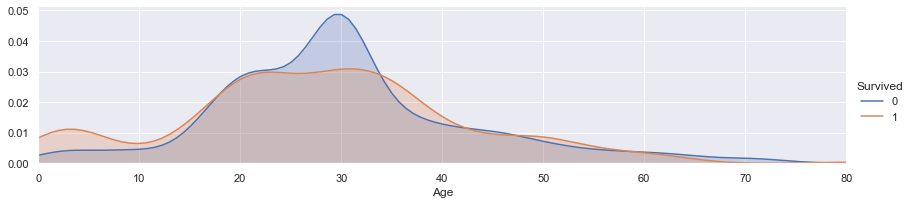

In [ ]:
facet= sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age',shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

In [ ]:
def chart_kdeplot(feature, x_min, x_max):
    facet= sns.FacetGrid(titanic, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, feature,shade=True)
    facet.set(xlim=(0, titanic[feature].max()))
    facet.add_legend()
    plt.xlim(x_min,x_max)

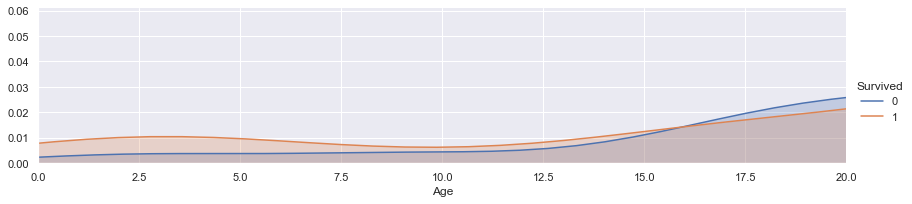

In [ ]:
chart_kdeplot('Age',0,20)

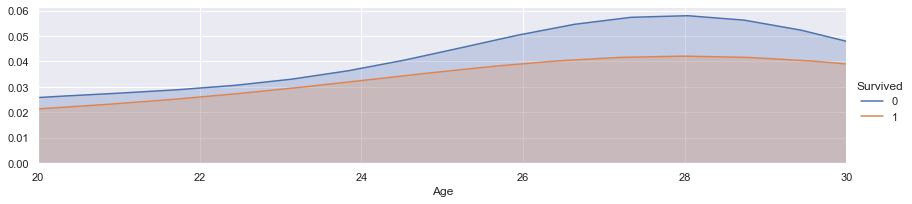

In [ ]:
chart_kdeplot('Age',20,30)

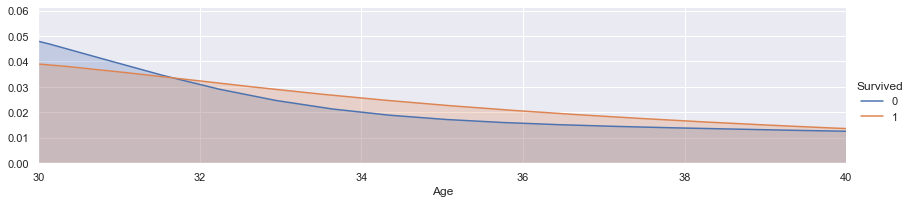

In [ ]:
chart_kdeplot('Age',30,40)

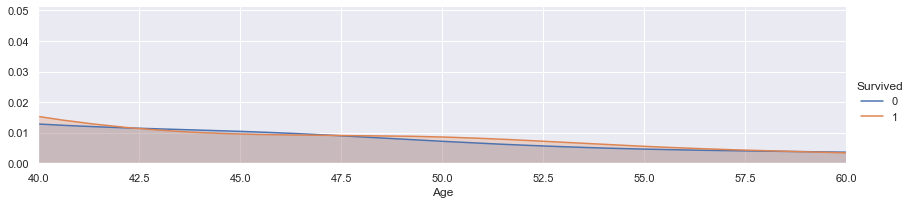

In [ ]:
chart_kdeplot('Age',40,60)

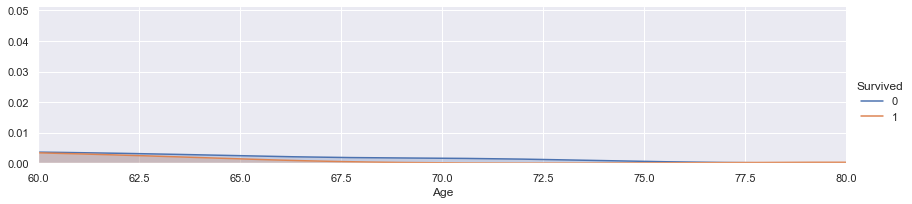

In [ ]:
chart_kdeplot('Age',60,80)

In [ ]:
##  child:0, young:1, adult:2, mid-age:3, senior:4

In [ ]:

titanic.loc[titanic['Age']<=16, 'Age1']=0,
titanic.loc[(titanic['Age']>16) &  (titanic['Age']<=26), 'Age1']=1,
titanic.loc[(titanic['Age']>26) &  (titanic['Age']<=36), 'Age1']=2,
titanic.loc[(titanic['Age']>36) &  (titanic['Age']<=62), 'Age1']=3,
titanic.loc[titanic['Age']>62 ,'Age']=4

In [ ]:
titanic['Age1'].value_counts()

2.0    336
1.0    255
3.0    181
0.0    104
Name: Age1, dtype: int64

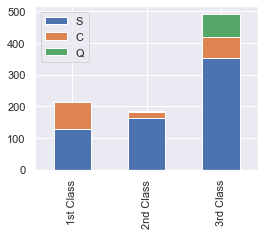

In [ ]:
import pandas as pd
Pclass1= titanic[titanic['Pclass']==1]['Embarked'].value_counts()
Pclass2= titanic[titanic['Pclass']==2]['Embarked'].value_counts()
Pclass3= titanic[titanic['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1 , Pclass2 , Pclass3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True, figsize=(4,3))

In [ ]:
titanic['Embarked1']=titanic['Embarked'].fillna('S')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num,Age1,Embarked1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1.0,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,3.0,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1.0,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,2.0,S


In [ ]:
#{"S":0,"C":1,"Q":2}

embark_mapping={"S":0,"C":1,"Q":2}
titanic['Embarked2']=titanic['Embarked1'].map(embark_mapping)

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num,Age1,Embarked1,Embarked2
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1.0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,3.0,C,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1.0,S,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,S,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,2.0,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,Mr,0,0,2.0,Q,2
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,Mr,0,0,3.0,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,Master,3,0,0.0,S,0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,Mrs,2,0,2.0,S,0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0,0.0,C,1


In [ ]:
titanic['Embarked1'].value_counts()

S    646
C    168
Q     77
Name: Embarked1, dtype: int64

In [ ]:
titanic['Embarked2'].value_counts()

0    646
1    168
2     77
Name: Embarked2, dtype: int64

### Fare

In [ ]:
## 실습) Fare column 
# <=17, 0
# >17 and <=30, 1
# >30 and <=100,2
# >100, 3

In [ ]:
titanic.loc[titanic['Fare']<=17, 'Fare1']=0,
titanic.loc[(titanic['Fare']>17) &  (titanic['Fare']<=30), 'Fare1']=1,
titanic.loc[(titanic['Fare']>30) &  (titanic['Fare']<=100), 'Fare1']=2,
titanic.loc[titanic['Fare']>100 ,'Fare1']=3

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titlenum,Title num,Age1,Embarked1,Embarked2,Fare1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1.0,S,0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,3.0,C,1,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1.0,S,0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,S,0,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,2.0,S,0,0.0


### Cabin

In [ ]:
titanic['Cabin1']=titanic['Cabin'].str[:1]

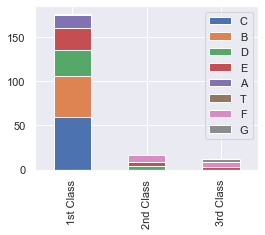

In [ ]:
#데이터 어떻게 생겼는지
Pclass1= titanic[titanic['Pclass']==1]['Cabin1'].value_counts()
Pclass2= titanic[titanic['Pclass']==2]['Cabin1'].value_counts()
Pclass3= titanic[titanic['Pclass']==3]['Cabin1'].value_counts()
df=pd.DataFrame([Pclass1 , Pclass2 , Pclass3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True, figsize=(4,3))

In [ ]:
#매핑(문자열은 결측치 처리 어려우니까)
cabin_mapping={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8,}

titanic['Cabin2']=titanic['Cabin1'].map(cabin_mapping)

In [ ]:
#중앙값으로 대치
titanic['Cabin2'].fillna(titanic.groupby("Pclass")["Cabin2"].transform("median"),inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Titlenum,Title num,Age1,Embarked1,Embarked2,Fare1,Cabin1,Cabin2,FamilySize,FamilySize1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1.0,S,0,0.0,NaN,2.0,2,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,...,2,0,3.0,C,1,2.0,C,0.8,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,1.0,S,0,0.0,NaN,2.0,1,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,...,2,0,2.0,S,0,2.0,C,0.8,2,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,...,0,0,2.0,S,0,0.0,NaN,2.0,1,0.0


### Family Size

In [ ]:
titanic["FamilySize"]=titanic['SibSp']+titanic["Parch"]+1

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Titlenum,Title num,Age1,Embarked1,Embarked2,Fare1,Cabin1,Cabin2,FamilySize,FamilySize1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1.0,S,0,0.0,NaN,2.0,2,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,...,2,0,3.0,C,1,2.0,C,0.8,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,1.0,S,0,0.0,NaN,2.0,1,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,...,2,0,2.0,S,0,2.0,C,0.8,2,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,...,0,0,2.0,S,0,0.0,NaN,2.0,1,0.0


In [ ]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
titanic['FamilySize1']=titanic['FamilySize'].map(family_mapping)

In [ ]:
## Survived, Pclass, Title2, Sex1, Age1, Embarked2, Fare1, Cabin2, FamilySize1
## 컬럼 이름 변경 - 원래 컬럼 이름으로 

In [ ]:
sel_column=["Survived", "Pclass", "Title num", "Sex1", "Age1", "Embarked2", "Fare1", "Cabin2", "FamilySize1"]
titanic_new=titanic[sel_column]

KeyError: "['Sex1'] not in index"

In [ ]:
titanic_new.column=["Survived", "Pclass", "Title", "Sex", "Age", "Embarked", "Fare", "Cabin", "FamilySize"]

AttributeError: 'list' object has no attribute 'column'